# Linear Regression

We will try to figure out how linear regression finds the best fitting line and what the best actually means.

### Thus our goal is to:
- Understand linear regression conceptually  
- Implement it from scratch (no sklearn)  
- See how optimization works via gradient descent  

## 1. Problem setup (intuitive)

We are given data points $(x^{(i)}, y^{(i)})$.

Our task is to find a function that predicts $y$ from $x$ as accurately as possible.

In linear regression, we restrict ourselves to **linear functions**:
- straight lines in 1D
- hyperplanes in higher dimensions<br> 
  (*A hyperplane is just a (n-1) dimesnional subspace that divides n dimensional space into 2 halves)


## 2. Vectorized hypothesis

To write linear regression compactly, we use vectors.

We define the parameter vector:

$$
\theta =
\begin{bmatrix}
\theta_0 \\
\theta_1
\end{bmatrix}
$$
$\theta$ are also called the features or parameters of the data

and the augmented input vector:

$$
x =
\begin{bmatrix}
1 \\
x
\end{bmatrix}
$$

Then the hypothesis can be written as:

$$
h_\theta(x) = \theta^\top x
$$

This formulation will generalize naturally to multiple features.


## 3. Measuring error: the cost function

To decide which parameters are closer, we need a way to measure error.

For each data point:
$$
\text{error} = h_\theta(x^{(i)}) - y^{(i)}
$$

We combine all errors using the **mean squared error**:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (h_\theta(x^{(i)}) - y^{(i)})^2 
$$
$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m (\theta^Tx^{(i)} - y^{(i)})^2
$$

Why squared error?
- Small errors are ignored whereas large errors grow quadratically, leaning the model to fixing these mistakes quickly
- Smooth and differentiable
- Leads to a convex optimization problem, always leads to a minima
  <br>

  Now,
  one might ask: If we can square it , why not higher powers like cubed or 4th power?<br>

  The reason to this being, odd powers give us a problem with sign of error, and larger even powers although do not have any sign problems, they increase the large errors way too quickly, leading to a panic in the model.



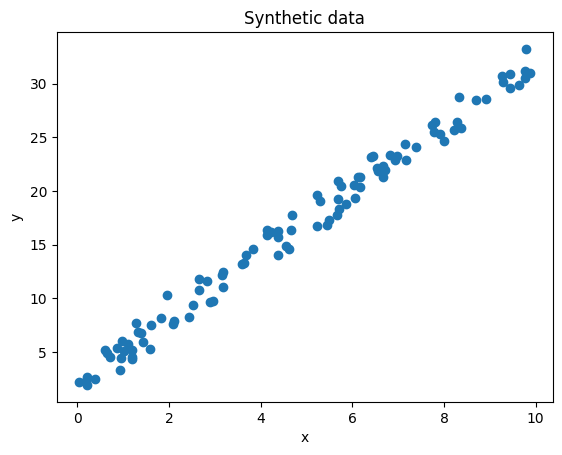

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

X_raw = np.random.rand(100, 1) * 10

X = np.c_[np.ones((100, 1)), X_raw] 
true_theta = np.array([2.0, 3.0])

y = X @ true_theta + np.random.randn(100) #We add random numbers to stimulate noise, or else data will be more of a straight line

plt.scatter(X_raw, y)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic data")
plt.show()


## 4. Gradient Descent


The cost function defines a surface over parameter space.

Because $J(\theta)$ is convex, it has:
- one global minimum
- no local minima

Gradient descent iteratively updates parameters by moving
in the direction of steepest decrease of the cost.



## 5. Gradient of the Cost Function

To minimize the cost, we need the direction of steepest increase.

The gradient of the squared error cost is:
$$
\nabla_\theta J(\theta) = \frac{1}{m} X^T (X\theta - y)
$$

Interpretation:
- $X\theta - y$ is the residual vector
- $X^T$ aggregates how each parameter contributes to error
- This gives the direction of fastest increase in cost
- We move in the opposite direction



## 7. The Normal Equation

Gradient Descent is an approximation. It takes steps. But for Linear Regression, there is a **closed-form solution** that gives the exact optimal $\theta$ without any loops.

The formula comes from setting the gradient to zero and solving for $\theta$:
$$\theta = (X^T X)^{-1} X^T y$$

**Why use Gradient Descent at all then?**
The Normal Equation requires calculating the inverse of a matrix $(X^T X)^{-1}$.
* Inverting a matrix is computationally expensive: roughly $O(n^3)$.
* If you have 100 features, it's instant.
* If you have 1,000,000 features (common in Deep Learning), the Normal Equation is impossible to run.

But for our dataset? It gives the **perfect** answer instantly.